# Convolutional Neural Networks (CNNs)


## CIFAR100 Database


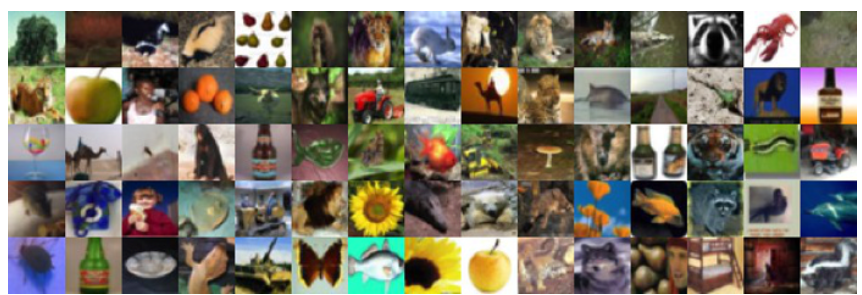

- **Composition**:
  - The CIFAR100 database contains 60,000 images.
  - Images are labeled according to 20 superclasses (e.g., *aquatic mammals*).
  - Each superclass has five specific classes (e.g., *beaver*, *dolphin*, *otter*, *seal*, *whale*).

- **Image Specifications**:
  - Each image has a resolution of 32 × 32 pixels.
  - Each pixel has three eight-bit values representing red, green, and blue colors.
  - The pixel values are organized in a three-dimensional array known as a *feature map*.
    - The first two dimensions (32 × 32) represent the spatial layout.
    - The third dimension represents the color channels (red, green, and blue).

- **Dataset Split**:
  - **Training Set**: 50,000 images
  - **Test Set**: 10,000 images

### Step 1: Define Transformations

To preprocess the CIFAR100 dataset, we apply transformations that convert images to tensors and normalize pixel values. This normalization uses mean and standard deviation values specific to the CIFAR100 dataset.

#### Transformations

- **`transforms.ToTensor()`**: Converts image data from PIL format to a tensor.
- **`transforms.Normalize()`**: Standardizes the image using CIFAR100's mean and standard deviation values for each color channel (R, G, B).


In [ ]:
# Import necessary libraries
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Define transformations for CIFAR100 dataset (including normalization)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5071, 0.4867, 0.4408), (0.2675, 0.2565, 0.2761))  # Mean and std deviation for CIFAR100 dataset
])


- **Mean values**: `(0.5071, 0.4867, 0.4408)`
  - These values represent the average intensity of the Red, Green, and Blue channels across all images in the CIFAR100 dataset.

- **Standard deviation values**: `(0.2675, 0.2565, 0.2761)`
  - These values indicate the variation of pixel intensities from the mean in each color channel. Higher standard deviation values mean more variation in pixel intensities for that channel.

### Step 2: Load the CIFAR100 Dataset

The CIFAR100 dataset is split into training and test sets, each loaded separately with specified transformations. If the dataset is not already present in the specified root directory, it will be downloaded automatically.

#### Parameters
- **`train=True`**: Loads the training set (50,000 images).
- **`train=False`**: Loads the test set (10,000 images).
- **`download=True`**: Downloads the dataset if it’s not already available locally.


In [ ]:
# Load the CIFAR100 dataset (train and test sets)
train_set = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)
test_set = torchvision.datasets.CIFAR100(root='./data', train=False, download=True, transform=transform)

### Step 3: Set Up Data Loaders

The `DataLoader` class is used to load data in batches, enabling efficient data handling and shuffling, especially useful during training.

#### Parameters
- **`batch_size=4`**: Loads 4 images per batch.
- **`shuffle=True`**: Randomly shuffles the training data at each epoch to improve generalization.
- **`shuffle=False`**: Loads test data in a fixed order for consistency during evaluation.

In [ ]:
# Set up data loaders (for both training and test sets)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=4, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=4, shuffle=False)

### Check the data

In [ ]:
# Check the class names
classes = train_set.classes
print(f"Classes: {classes}")

In [ ]:
# Function to display an image
def imshow(img):
    img = img / 2 + 0.5  # Reverse normalization
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get one batch of training data
data_iter = iter(train_loader)
images, labels = next(data_iter)  # Use the built-in next() function

# Display images and print labels
print("Sample images from CIFAR100 Training Set")
imshow(torchvision.utils.make_grid(images))
print('Labels:', ' '.join(f'{classes[labels[j]]}' for j in range(4)))


In [ ]:
# Function to display an image and its individual channels
def show_channels(img):
    # Reverse normalization
    img = img / 2 + 0.5
    npimg = img.numpy()

    # Split the channels
    red_channel = npimg[0, :, :]
    green_channel = npimg[1, :, :]
    blue_channel = npimg[2, :, :]

    # Set up the plot
    fig, axs = plt.subplots(1, 4, figsize=(12, 4))

    # Display the original image
    axs[0].imshow(np.transpose(npimg, (1, 2, 0)))
    axs[0].set_title("Original Image")
    axs[0].axis("off")

    # Display each channel separately
    axs[1].imshow(red_channel, cmap="Reds")
    axs[1].set_title("Red Channel")
    axs[1].axis("off")

    axs[2].imshow(green_channel, cmap="Greens")
    axs[2].set_title("Green Channel")
    axs[2].axis("off")

    axs[3].imshow(blue_channel, cmap="Blues")
    axs[3].set_title("Blue Channel")
    axs[3].axis("off")

    plt.show()

# Get one batch of training data
data_iter = iter(train_loader)
images, labels = next(data_iter)

# Display one image and its channels
print("Displaying one image and its color channels")
show_channels(images[0])  # Show the first image in the batch
print('Label:', classes[labels[0]])


## Background of Convolutional Neural Networks (CNNs)

A specialized family of neural networks, known as *convolutional neural networks* (CNNs), emerged to handle image classification tasks and demonstrated spectacular performance across a broad range of problems. CNNs are designed to emulate how humans recognize objects in images, by detecting specific features or patterns that characterize each object class.

### Action
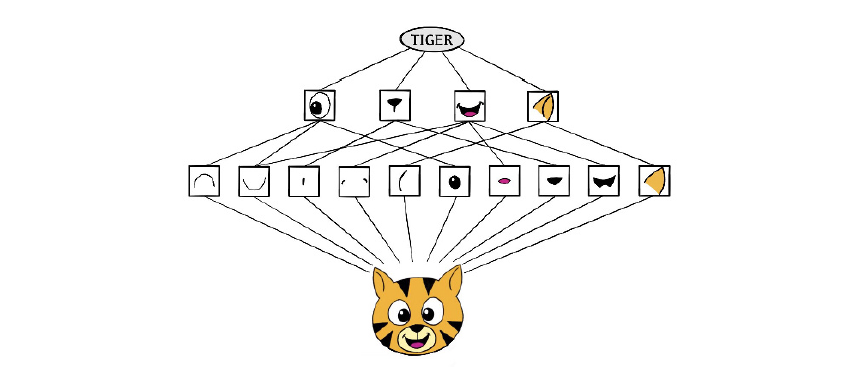

Schematic showing how a convolutional neural network classifies
an image of a tiger. The network takes in the image and identifies local features.
It then combines the **local features** in order to create compound features, which in
this example include eyes and ears. These compound features are used to output
the label “tiger”

---


The CNN first identifies low-level features within the input image, such as edges and color patches. These low-level features are progressively combined into higher-level features, such as parts of ears or eyes, which are further used to determine the probability of a particular output class.


### Building the Feature Hierarchy in CNNs

To construct this hierarchical representation, CNNs employ two specialized hidden layers:

1. **Convolution Layers**:
   - Convolution layers are responsible for searching for instances of small patterns across the image.
   
2. **Pooling Layers**:
   - Pooling layers downsample the feature maps generated by convolution layers, retaining a subset of the most prominent features.

Contemporary neural network architectures often employ multiple convolution and pooling layers to achieve state-of-the-art performance.

### Convolution Layers

A convolution layer is composed of numerous convolution filters, each acting as a template to identify specific local features within an image. A convolution filter uses a straightforward operation, called a **convolution**, which involves repeatedly multiplying and summing matrix elements.

To understand how a convolution filter works, consider a simple example of a 4 × 3 image:


<p align="center">
$\text{Original Image} =
\begin{pmatrix}
a & b & c \\
d & e & f \\
g & h & i \\
j & k & l \\
\end{pmatrix}$
</p>
Now, consider a 2 × 2 filter of the form:

<p align="center">
$\text{Convolution Filter} =
\begin{pmatrix}
\alpha & \beta \\
\gamma & \delta \\
\end{pmatrix}$
</p>

When we convolve the image with the filter, we obtain the result:

<p align="center">
$\text{Convolved Image} =
\begin{pmatrix}
a\alpha + b\beta + d\gamma + e\delta & b\alpha + c\beta + e\gamma + f\delta \\
d\alpha + e\beta + g\gamma + h\delta & e\alpha + f\beta + h\gamma + i\delta \\
g\alpha + h\beta + j\gamma + k\delta & h\alpha + i\beta + k\gamma + l\delta \\
\end{pmatrix}$
</p>

----



#### Action

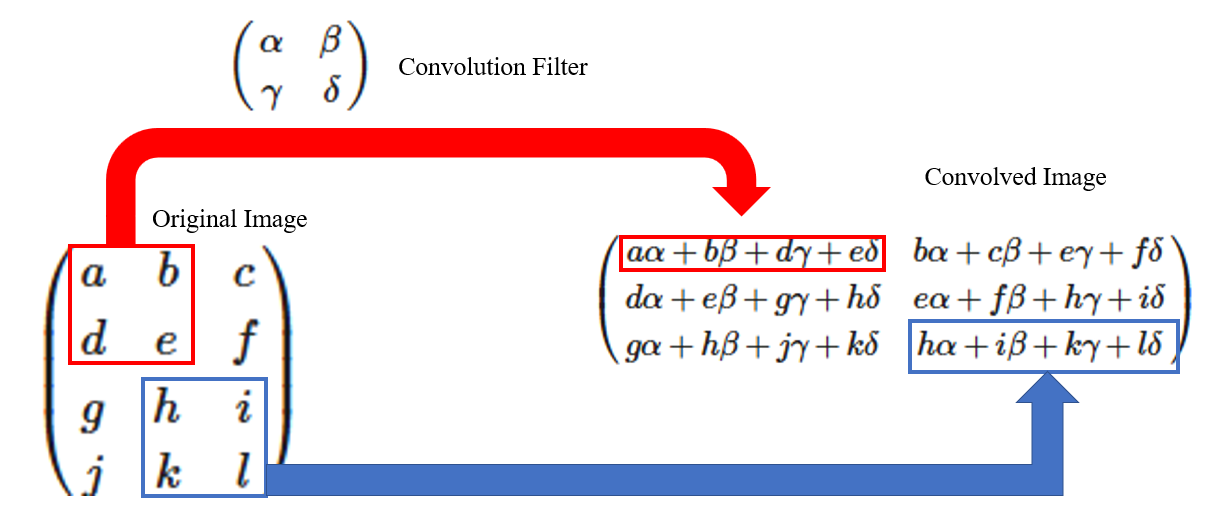


For example, the top-left element in the convolved image is calculated by multiplying each element in the 2 × 2 filter by the corresponding element in the top-left 2 × 2 portion of the image, and summing the results. The other elements are calculated similarly, with the convolution filter applied to every 2 × 2 submatrix of the original image. If a submatrix resembles the filter, it results in a high value; otherwise, it results in a low value. This highlights regions in the original image that resemble the filter.

In general, convolution filters are small arrays, typically of size $p_1 \times p_2$, where $p_1$ and $p_2$ are small positive integers that may differ in size.

---

In [ ]:
import numpy as np

# Define the original 4x3 image as a 2D NumPy array
original_image = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
    [10, 11, 12]
])

# Define the 2x2 convolution filter
convolution_filter = np.array([
    [0.1, 0.2],
    [0.3, 0.4]
])

# Define a function to apply the convolution filter to the original image
def apply_convolution(image, filter):
    # Get dimensions of the image and the filter
    image_height, image_width = image.shape
    filter_height, filter_width = filter.shape

    # Calculate dimensions of the output convolved image
    output_height = image_height - filter_height + 1
    output_width = image_width - filter_width + 1
    convolved_image = np.zeros((output_height, output_width))

    # Perform convolution
    for i in range(output_height):
        for j in range(output_width):
            # Extract the current region of the image
            image_region = image[i:i + filter_height, j:j + filter_width]
            # Element-wise multiplication and sum to get the convolved value
            convolved_image[i, j] = np.sum(image_region * filter)

    return convolved_image

# Apply the convolution function to the original image and filter
convolved_image = apply_convolution(original_image, convolution_filter)

# Print the resulting convolved image
print("Original Image:\n", original_image)
print("\nConvolution Filter:\n", convolution_filter)
print("\nConvolved Image:\n", convolved_image)


Below tigher figure illustrates the application of two convolution filters to a 192 × 179 image of a tiger, shown on the left-hand side.

Each convolution filter is a 15 × 15 image containing mostly zeros (black), with a narrow strip of ones (white) oriented either vertically or horizontally within the image.

- **Convolution Process**:
  - When each filter is convolved with the tiger image:
    - Regions of the tiger image that resemble the filter (e.g., areas with horizontal or vertical stripes or edges) are assigned large values.
    - Areas that do not match the filter's orientation are assigned smaller values.

The resulting convolved images are displayed on the right-hand side:

- The *vertical stripe filter* highlights vertical stripes and edges in the tiger image.
- The *horizontal stripe filter* highlights horizontal stripes and edges in the tiger image.

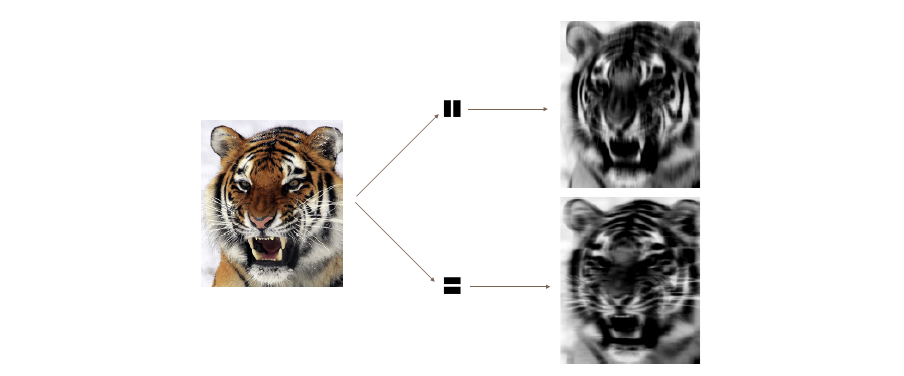

In a convolution layer, we use a *bank of filters* to detect a variety of differently-oriented edges and shapes within an image. In traditional image processing, using predefined filters is standard practice. However, in CNNs, the filters are learned specifically for the classification task at hand. The filter weights can be viewed as parameters connecting the input layer to the hidden layer, with each hidden unit corresponding to a pixel in the convolved image.

These parameters are *structured and constrained*:
- They operate on localized patches in the input image, leading to structural zeros.
- The same weights in each filter are reused across all possible patches in the image, constraining the weights.

#### Additional Details

- **Color Channels**:
  - Since the input image is in color, it has three channels, forming a three-dimensional feature map (array).
  - Each channel is a 32 × 32 two-dimensional feature map, representing red, green, and blue.
  - A single convolution filter will also have three channels (one per color), each with a 3 × 3 dimension and potentially different filter weights.
  - The three convolution results are summed to form a two-dimensional output feature map. The color information is thus used but is not passed on to subsequent layers except through its role in the convolution.

- **Multiple Convolution Filters**:
  - If we apply $K$ different convolution filters in the first hidden layer, we obtain $K$ two-dimensional output feature maps, which together are treated as a single three-dimensional feature map.
  - Each of these $K$ output maps serves as a separate channel of information, giving us $K$ channels, as opposed to the initial three color channels.
  - This three-dimensional feature map functions like the activations in a hidden layer of a neural network, though organized spatially.

- **Activation Function**:
  - We typically apply the *ReLU activation function* to the convolved image. This activation step is sometimes viewed as a separate layer in the CNN, referred to as a *detector layer*.


### Pooling Layers

A pooling layer condenses a large image into a smaller summary image. There are various ways to perform pooling, but *max pooling* is a commonly used method. In max pooling, each non-overlapping 2 × 2 block of pixels in an image is summarized using the maximum value within that block. This reduces the image size by a factor of two in each dimension, while providing some *location invariance*—as long as there is a large value in one of the four pixels in the block, the entire block registers as a large value in the reduced image.


Consider a simple example of max pooling on a 4 × 4 image:

<p align="center">
$\text{Original Image} =
\begin{pmatrix}
1 & 2 & 5 & 3 \\
3 & 0 & 1 & 2 \\
2 & 1 & 3 & 4 \\
1 & 1 & 2 & 0 \\
\end{pmatrix}$
</ㅔ>

After applying max pooling, we get:

<p align="center">
$\text{Max-Pooled Image} =
\begin{pmatrix}
3 & 5 \\
2 & 4 \\
\end{pmatrix}$
</p>

In this example, each 2 × 2 block in the original image is replaced by its maximum value, resulting in a condensed 2 × 2 image.

---

#### Action

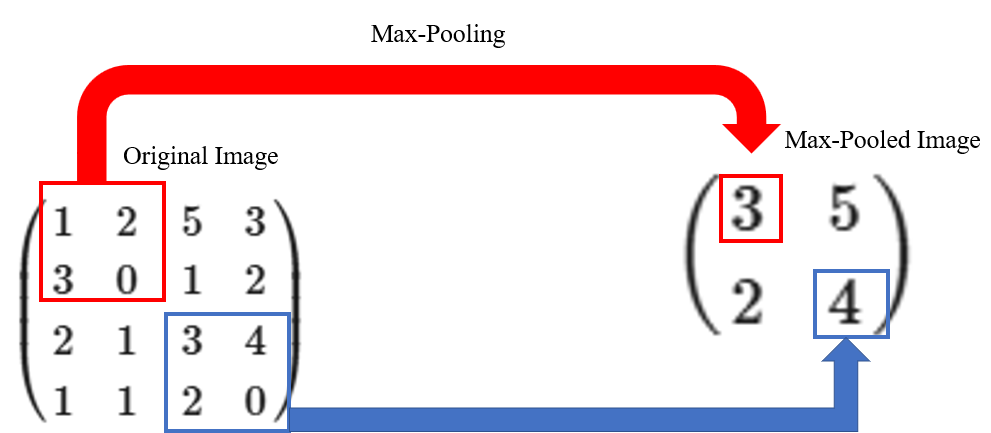

In [ ]:
import numpy as np

# Define the original 4x4 image as a 2D NumPy array
original_image = np.array([
    [1, 2, 5, 3],
    [3, 0, 1, 2],
    [2, 1, 3, 4],
    [1, 1, 2, 0]
])

# Define a function for 2x2 max pooling
def max_pooling(image, pool_size=2):
    # Get dimensions of the image
    image_height, image_width = image.shape
    # Calculate dimensions of the pooled image
    pooled_height = image_height // pool_size
    pooled_width = image_width // pool_size
    # Initialize the pooled image with zeros
    pooled_image = np.zeros((pooled_height, pooled_width))

    # Perform max pooling
    for i in range(pooled_height):
        for j in range(pooled_width):
            # Extract the current 2x2 region of the image
            image_region = image[i*pool_size:(i+1)*pool_size, j*pool_size:(j+1)*pool_size]
            # Get the maximum value in the 2x2 region
            pooled_image[i, j] = np.max(image_region)

    return pooled_image

# Apply max pooling to the original image
pooled_image = max_pooling(original_image)

# Print the original and max-pooled images
print("Original Image:\n", original_image)
print("\nMax-Pooled Image:\n", pooled_image)


### Architecture of a Convolutional Neural Network

So far, we have defined a single convolution layer—each filter produces a new two-dimensional feature map. The number of convolution filters in a convolution layer is akin to the number of units at a particular hidden layer in a fully-connected neural network. This number also determines the number of channels in the resulting three-dimensional feature map. We also described a pooling layer, which reduces the first two dimensions of each three-dimensional feature map. *Deep CNNs* have many such layers.

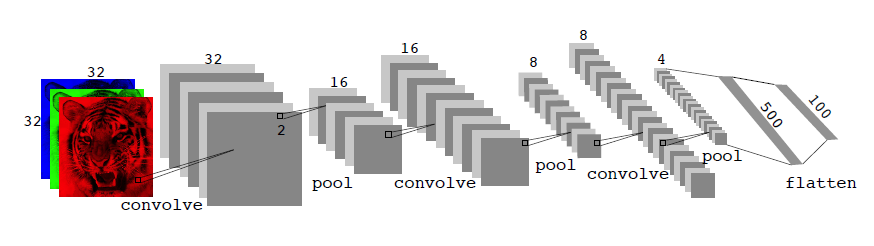


In the **input layer**, we have a three-dimensional feature map of a color image, where:
- The *channel axis* represents each color by a 32 × 32 two-dimensional feature map of pixels.
- Each convolution filter produces a new channel at the first hidden layer, which is also a 32 × 32 feature map (with edge padding).
- After the first round of convolutions, a new "image" is formed as a feature map with more channels than the initial three color channels (e.g., six channels if using six convolution filters).

In the **pooling layer**, we reduce the feature map size by a factor of four (two in each dimension).


**Repeating Convolve-then-Pool Sequence**:
   - This sequence is repeated in the next two layers.

---

#### Additional Details

- **Subsequent Convolution Layers**:
  - Each new convolve layer takes the three-dimensional feature map from the previous layer as input and treats it like a single multi-channel image. Each convolution filter has as many channels as this feature map.

- **Increasing Filter Count**:
  - As the feature maps are reduced in size with each pooling layer, the number of filters in the next convolution layer is often increased to compensate.

- **Stacking Convolution Layers**:
  - Often, several convolution layers are stacked before applying a pooling layer, which effectively increases the filter’s depth.

This process is repeated until the feature maps are reduced to a few pixels in each dimension. At this point, the three-dimensional feature maps are *flattened* (pixels are treated as individual units) and fed into one or more fully-connected layers. The final layer is a softmax activation, outputting probabilities for the 100 classes.


### Dropout: Tuning Parameters for Regularization

- **Dropout**: A regularization technique that can be applied to each layer, helping prevent overfitting by randomly "dropping out" neurons during training.

Constructing a CNN with optimal parameters can seem daunting, but there are excellent software frameworks available that offer extensive examples and vignettes to guide parameter selection.

#### Dropout in Neural Networks

**Dropout** is a regularization technique used in neural networks to prevent overfitting. Introduced by Srivastava et al. in 2014, it works by randomly "dropping out" a subset of neurons during the training phase, which forces the network to learn more robust and generalizable features.
  - Srivastava, Nitish, Geoffrey Hinton, Alex Krizhevsky, Ilya Sutskever, and Ruslan Salakhutdinov. "Dropout: a simple way to prevent neural networks from overfitting." The journal of machine learning research 15, no. 1 (2014): 1929-1958.


**How Dropout Works**

During each training iteration:
1. A random subset of neurons in the network is "dropped out," or temporarily disabled, meaning they do not participate in forward or backward propagation.
2. The probability of dropping a neuron is controlled by a hyperparameter, **dropout rate** (often denoted as `p`), which usually ranges between 0.2 and 0.5.
3. Only the remaining neurons are used to process the input and update the weights.

In essence, Dropout changes the architecture of the network in each iteration, creating an ensemble of many "thinned" networks within the main network. During testing, Dropout is disabled, and all neurons are used. To ensure consistency, the weights are scaled by the dropout rate `p` to balance the activations.

**Why Dropout Helps**

Dropout prevents the network from becoming overly dependent on specific neurons, thereby reducing overfitting. It encourages the model to learn multiple independent features since any given neuron has a chance of being dropped in each iteration. This ensembling effect leads to improved generalization on unseen data.

**Dropout Rate**

The **dropout rate** `p` is a hyperparameter that defines the probability of dropping a neuron:
- Typical values range from **0.2 to 0.5**.
- Lower values (e.g., `p = 0.2`) retain more neurons, which may be better for simpler tasks.
- Higher values (e.g., `p = 0.5`) drop more neurons, which may be beneficial for larger networks with higher capacity.

### Data Augmentation

An additional important technique used in image modeling is *data augmentation*. Essentially, each training image is replicated multiple times, with each replicate randomly distorted in a natural way, ensuring human recognition is unaffected.

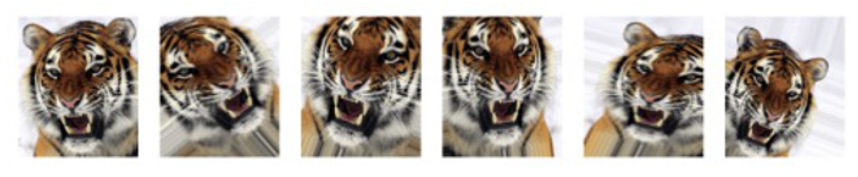

The original image (leftmost) is distorted
in natural ways to produce different images with the same class label. These
distortions do not fool humans, and act as a form of regularization when fitting
the CNN.

In [ ]:
# Define a function to apply augmentations and display images in a 3x2 panel layout
def show_augmented_images(original_img, augmentations):
    fig, axs = plt.subplots(3, 2, figsize=(10, 10))

    # Display the original image
    original_img_np = original_img.numpy().transpose((1, 2, 0))  # Convert to (H, W, C) for display
    original_img_np = np.clip(original_img_np, 0, 1)  # Clip values to [0, 1]
    axs[0, 0].imshow(original_img_np)
    axs[0, 0].set_title("Original Image")
    axs[0, 0].axis("off")

    # Apply each augmentation and display in the 3x2 grid
    aug_names = list(augmentations.keys())
    for i in range(3):
        for j in range(2):
            if i == 0 and j == 0:
                continue  # Skip the first cell for the original image

            aug_name = aug_names.pop(0)
            aug_transform = augmentations[aug_name]
            augmented_image = aug_transform(original_img)  # Apply augmentation directly on tensor

            # Display the augmented image
            augmented_image_np = augmented_image.numpy().transpose((1, 2, 0))  # Convert to (H, W, C)
            augmented_image_np = np.clip(augmented_image_np, 0, 1)  # Clip values to [0, 1]
            axs[i, j].imshow(augmented_image_np)
            axs[i, j].set_title(aug_name)
            axs[i, j].axis("off")

    plt.tight_layout()
    plt.show()

# Data augmentation transformations
augmentations = {
    "Zoom": transforms.Compose([
        transforms.RandomResizedCrop(32, scale=(0.4, 0.5)),  # Tensor-based random crop
    ]),
    "Horizontal Shift": transforms.Compose([
        transforms.RandomAffine(degrees=0, translate=(0.5, 0)),  # Tensor-based affine transformation
    ]),
    "Vertical Shift": transforms.Compose([
        transforms.RandomAffine(degrees=0, translate=(0, 0.5)),  # Tensor-based affine transformation
    ]),
    "Shear": transforms.Compose([
        transforms.RandomAffine(degrees=0, shear=40),  # Tensor-based shear transformation
    ]),
    "Small Rotation": transforms.Compose([
        transforms.RandomRotation(degrees=45),  # Tensor-based rotation
    ])
}

# Get one image from the dataset
data_iter = iter(train_loader)
images, labels = next(data_iter)
image = images[0]  # Select the first image from the batch

# Display original and augmented images in a 3x2 panel layout
show_augmented_images(image, augmentations)


#### Typical Distortions in Data Augmentation

Common types of distortions include:
- Zoom
- Horizontal and vertical shifts
- Shear
- Small rotations

At its core, data augmentation increases the training set size with varied examples, helping to prevent overfitting. This can be seen as a form of regularization: by creating a "cloud" of images around each original image, all sharing the same label, we effectively "fatten" the dataset. This is conceptually similar to ridge regularization.

## Practice

### Train and Test Data

In [ ]:
len(train_set), len(test_set)

In [ ]:
from torch.utils.data import DataLoader, Subset, random_split

# Reduce the dataset size to 10% of the original size
train_size = int(0.1 * len(train_set))  # 10% of the original training data
test_size = int(0.1 * len(test_set))    # 10% of the original test data

# Generate random indices for 10% subsets
train_indices = np.random.choice(len(train_set), train_size, replace=False)
test_indices = np.random.choice(len(test_set), test_size, replace=False)

# Create subsets
train_set = Subset(train_set, train_indices)
test_set = Subset(test_set, test_indices)

# Set up data loaders (for both training and test sets)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=4, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=4, shuffle=False)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

### Model

In [ ]:
import torch
import torch.nn as nn

# Define the CNN Model with Dropout
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()

        # First convolutional layer
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout_conv = nn.Dropout(p=0.25)  # Dropout after convolutional layers

        # Second convolutional layer
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=3, padding=1)

        # Third convolutional layer
        self.conv3 = nn.Conv2d(in_channels=12, out_channels=24, kernel_size=3, padding=1)

        # Fully connected layers with dropout
        self.fc1 = nn.Linear(in_features=24 * 4 * 4, out_features=500)
        self.dropout_fc = nn.Dropout(p=0.5)  # Dropout after fully connected layer
        self.fc2 = nn.Linear(in_features=500, out_features=100)  # Output layer for 100 classes

    def forward(self, x):
        # Convolution layer 1
        x = torch.relu(self.conv1(x))  # Shape: (6 channels, 32x32)
        x = self.pool(x)               # Shape: (6 channels, 16x16)

        # Convolution layer 2
        x = torch.relu(self.conv2(x))  # Shape: (12 channels, 16x16)
        x = self.pool(x)               # Shape: (12 channels, 8x8)

        # Convolution layer 3
        x = torch.relu(self.conv3(x))  # Shape: (24 channels, 8x8)
        x = self.pool(x)               # Shape: (24 channels, 4x4)

        # Apply dropout after the convolutional layers
        x = self.dropout_conv(x)

        # Flatten for fully connected layers
        x = x.view(-1, 24 * 4 * 4)      # Shape: (384)

        # Fully connected layers with dropout
        x = torch.relu(self.fc1(x))    # Shape: (500)
        x = self.dropout_fc(x)         # Apply dropout after fully connected layer
        x = self.fc2(x)                # Shape: (100)

        return x


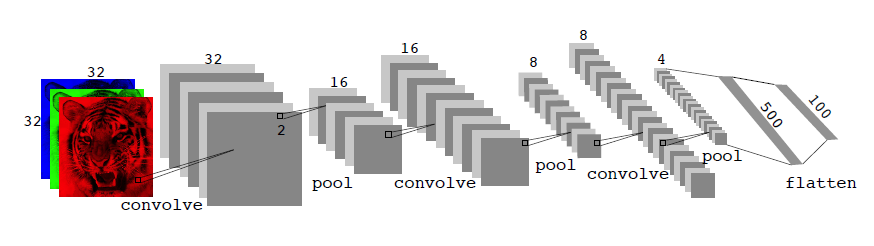

This CNN model is designed for image classification on the CIFAR100 dataset, which has images of size 32x32 pixels and 100 classes. The model consists of three convolutional layers, followed by max pooling, dropout, and fully connected layers.



1. **Convolutional Layer 1 (`conv1`)**
   - **Layer**: `nn.Conv2d(in_channels=3, out_channels=6, kernel_size=3, padding=1)`
   - **Purpose**: This layer takes a 3-channel input image (RGB) and applies 6 convolutional filters of size 3x3, producing 6 output channels.
   - **Padding**: `padding=1` maintains the spatial dimensions at 32x32.
   - **Pooling**: A `MaxPool2d` layer with kernel size 2 and stride 2 reduces the spatial dimensions from 32x32 to 16x16.
   - **Output Shape**: (6 channels, 16x16)
---


2. **Convolutional Layer 2 (`conv2`)**
   - **Layer**: `nn.Conv2d(in_channels=6, out_channels=12, kernel_size=3, padding=1)`
   - **Purpose**: This layer applies 12 convolutional filters of size 3x3 to the output of `conv1`, producing 12 output channels.
   - **Padding**: `padding=1` keeps the spatial dimensions at 16x16.
   - **Pooling**: A `MaxPool2d` layer reduces the spatial dimensions from 16x16 to 8x8.
   - **Output Shape**: (12 channels, 8x8)
---


3. **Convolutional Layer 3 (`conv3`)**
   - **Layer**: `nn.Conv2d(in_channels=12, out_channels=24, kernel_size=3, padding=1)`
   - **Purpose**: This layer applies 24 convolutional filters of size 3x3 to the output of `conv2`, producing 24 output channels.
   - **Padding**: `padding=1` keeps the spatial dimensions at 8x8.
   - **Pooling**: A `MaxPool2d` layer reduces the spatial dimensions from 8x8 to 4x4.
   - **Output Shape**: (24 channels, 4x4)
---

4. **Dropout Layer after Convolutions (`dropout_conv`)**
   - **Layer**: `nn.Dropout(p=0.25)`
   - **Purpose**: A dropout layer with a dropout rate of 0.25 is applied after the last convolutional layer to prevent overfitting by randomly deactivating 25% of neurons during training.
---

5. **Flattening Layer**
   - **Operation**: `x.view(-1, 24 * 4 * 4)`
   - **Purpose**: This layer flattens the output of the last pooling layer (24 channels of 4x4) into a 1-dimensional vector with `24 * 4 * 4 = 384` features, preparing it for the fully connected layers.
---

6. **Fully Connected Layer 1 (`fc1`)**
   - **Layer**: `nn.Linear(in_features=24 * 4 * 4, out_features=500)`
   - **Purpose**: This layer maps the 384-dimensional vector to 500 features, allowing the model to learn complex representations.
   - **Activation**: ReLU activation is applied after this layer.
---

7. **Dropout Layer after Fully Connected Layer (`dropout_fc`)**
   - **Layer**: `nn.Dropout(p=0.5)`
   - **Purpose**: A dropout layer with a dropout rate of 0.5 is applied after the first fully connected layer to further reduce the risk of overfitting by randomly deactivating 50% of neurons during training.
---

8. **Output Layer (`fc2`)**
   - **Layer**: `nn.Linear(in_features=500, out_features=100)`
   - **Purpose**: The output layer maps the 500 features down to 100 output classes, corresponding to the number of classes in CIFAR100.
   - **Activation**: No activation is applied here, as this layer’s output will be passed to a loss function like cross-entropy, which includes a softmax operation for classification.


#### Parameters in Each Layer

1. **Convolutional Layer 1 (`conv1`)**
   - **Input channels**: 3
   - **Output channels**: 6
   - **Kernel size**: 3x3
   - **Bias**: Yes
   - **Parameters**:
     $
     (3 \times 3 \times 3 + 1) \times 6 = 168
     $
   - **Explanation**: Each filter has $3 \times 3 \times 3 = 27$ weights, plus 1 bias per output channel, and there are 6 output channels.

2. **Convolutional Layer 2 (`conv2`)**
   - **Input channels**: 6
   - **Output channels**: 12
   - **Kernel size**: 3x3
   - **Bias**: Yes
   - **Parameters**:
     $
     (6 \times 3 \times 3 + 1) \times 12 = 660
     $
   - **Explanation**: Each filter has $6 \times 3 \times 3 = 54$ weights, plus 1 bias per output channel, and there are 12 output channels.

3. **Convolutional Layer 3 (`conv3`)**
   - **Input channels**: 12
   - **Output channels**: 24
   - **Kernel size**: 3x3
   - **Bias**: Yes
   - **Parameters**:
     $
     (12 \times 3 \times 3 + 1) \times 24 = 2,616
     $
   - **Explanation**: Each filter has $12 \times 3 \times 3 = 108$ weights, plus 1 bias per output channel, and there are 24 output channels.

4. **Fully Connected Layer 1 (`fc1`)**
   - **Input features**: $24 \times 4 \times 4 = 384$
   - **Output features**: 500
   - **Bias**: Yes
   - **Parameters**:
     $
     (384 \times 500) + 500 = 192,500
     $
   - **Explanation**: There are $384 \times 500 = 192,000$ weights and 500 biases (one for each output unit).

5. **Fully Connected Layer 2 (Output Layer, `fc2`)**
   - **Input features**: 500
   - **Output features**: 100 (number of classes)
   - **Bias**: Yes
   - **Parameters**:
     $
     (500 \times 100) + 100 = 50,100
     $
   - **Explanation**: There are $500 \times 100 = 50,000$ weights and 100 biases.

### Total Parameter Count

Adding up the parameters from each layer:

$
168 + 660 + 2,616 + 192,500 + 50,100 = 246,044
$

### Summary Table

| Layer                    | Parameters |
|--------------------------|------------|
| Convolutional Layer 1    | 168        |
| Convolutional Layer 2    | 660        |
| Convolutional Layer 3    | 2,616      |
| Fully Connected Layer 1  | 192,500    |
| Fully Connected Layer 2 (Output) | 50,100 |
| **Total**                | **246,044** |

Thus, the total number of parameters in the `SimpleCNN` model is **246,044**.



### Summary
- **Input Image Size**: 32x32 RGB image
- **Three Convolutional Layers**: Each convolutional layer is followed by max pooling, progressively reducing spatial dimensions from 32x32 to 4x4.
- **Dropout**:
  - Dropout with `p=0.25` is applied after the last convolutional layer.
  - Dropout with `p=0.5` is applied after the first fully connected layer.
- **Fully Connected Layers**: After flattening, two fully connected layers are used to classify the features into 100 classes.

This architecture uses dropout layers to help prevent overfitting, improving the model's ability to generalize to unseen data.


In [ ]:
# Instantiate the model and move it to the GPU
model = SimpleCNN().to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

### Model Training

In [ ]:
images.shape

In [ ]:
# Train the model
def train(model, train_loader, criterion, optimizer, epochs=10):
    model.train()
    for epoch in range(epochs):
      running_loss = 0.0
      for i, (images, labels) in enumerate(train_loader):
          # Move images and labels to the GPU
          images, labels = images.to(device), labels.to(device)

          optimizer.zero_grad()
          outputs = model(images)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()
          running_loss += loss.item()

          if (i+1) % 1000 == 0:  # Print every 1000 mini-batches
              print(f"Epoch [{epoch+1}/{epochs}], Step [{i+1}/{len(train_loader)}], Loss: {running_loss/1000:.4f}")
              running_loss = 0.0

# Evaluate the model
def evaluate(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            # Move images and labels to the GPU
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f"Test Accuracy: {100 * correct / total:.2f}%")

# Run training and evaluation
train(model, train_loader, criterion, optimizer, epochs=10)
evaluate(model, test_loader)

### Model Save and Load

In [ ]:
# Save the model's state_dict
torch.save(model.state_dict(), "simple_cnn.pth")
print("Model saved successfully.")

In [ ]:
# Create a new instance of the model
loaded_model = SimpleCNN().to(device)

# Load the saved model state
loaded_model.load_state_dict(torch.load("simple_cnn.pth"))
print("Model loaded successfully.")

## Prediction

In [ ]:
# Load the model
loaded_model = SimpleCNN().to(device)
loaded_model.load_state_dict(torch.load("simple_cnn.pth"))
loaded_model.eval()

# Function to denormalize images for visualization
def denormalize(img):
    mean = np.array([0.5071, 0.4867, 0.4408])
    std = np.array([0.2675, 0.2565, 0.2761])
    img = img * std[:, None, None] + mean[:, None, None]
    return img

# Select 20 random images from the test set
test_images = []
test_labels = []
pred_labels = []
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = loaded_model(images)
        _, predictions = torch.max(outputs, 1)

        for i in range(len(images)):
            test_images.append(images[i])
            test_labels.append(labels[i].item())
            pred_labels.append(predictions[i].item())
            if len(test_images) >= 20:
                break
        if len(test_images) >= 20:
            break

# Plot the 4x5 panel
fig, axes = plt.subplots(4, 5, figsize=(12, 10))
fig.suptitle("Model Predictions (Correct: Green, Incorrect: Red)", fontsize=16)
for i, ax in enumerate(axes.flat):
    # Get image, true label, and predicted label
    img = test_images[i].cpu()
    true_label = test_labels[i]
    pred_label = pred_labels[i]

    # Denormalize image and transpose to (H, W, C) format for plotting
    img = denormalize(img).permute(1, 2, 0).numpy()

    # Display image
    ax.imshow(np.clip(img, 0, 1))  # Clipping to keep pixel values within [0, 1]
    ax.axis('off')

    # Set title color based on correctness of the prediction
    color = "green" if true_label == pred_label else "red"
    ax.set_title(f"True: {true_label}\nPred: {pred_label}", color=color)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


## Model Improving

In [ ]:
# Split the training set into training and validation sets
val_ratio = 0.2  # 20% of the reduced training set will be used for validation
train_size = int((1 - val_ratio) * len(train_set))
val_size = len(train_set) - train_size

# Randomly split into training and validation sets
train_set_final, val_set_final = random_split(train_set, [train_size, val_size])

# Create DataLoaders
train_loader = DataLoader(train_set_final, batch_size=4, shuffle=True)
val_loader = DataLoader(val_set_final, batch_size=4, shuffle=False)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the  CNN Model with Batch Normalization and Dropout
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        # First convolutional layer
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)  # Batch Normalization
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout_conv = nn.Dropout(p=0.2)

        # Second convolutional layer
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)  # Batch Normalization

        # Third convolutional layer
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(128)  # Batch Normalization

        # Fourth convolutional layer
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1)
        self.bn4 = nn.BatchNorm2d(256)  # Batch Normalization

        # Fully connected layers with dropout
        self.fc1 = nn.Linear(in_features=256 * 2 * 2, out_features=512)  # Adjusted for larger depth
        self.dropout_fc = nn.Dropout(p=0.4)
        self.fc2 = nn.Linear(in_features=512, out_features=100)  # Output layer for 100 classes

    def forward(self, x):
        # Convolution layer 1
        x = self.pool(torch.relu(self.bn1(self.conv1(x))))

        # Convolution layer 2
        x = self.pool(torch.relu(self.bn2(self.conv2(x))))

        # Convolution layer 3
        x = self.pool(torch.relu(self.bn3(self.conv3(x))))

        # Convolution layer 4
        x = self.pool(torch.relu(self.bn4(self.conv4(x))))

        # Apply dropout after the convolutional layers
        x = self.dropout_conv(x)

        # Flatten for fully connected layers
        x = x.view(-1, 256 * 2 * 2)    # Adjusted for added layers and pooling

        # Fully connected layers with dropout
        x = torch.relu(self.fc1(x))
        x = self.dropout_fc(x)
        x = self.fc2(x)

        return x


### CNN Model with Batch Normalization and Dropout

This `CNN` model is designed for image classification tasks, incorporating **Batch Normalization** and **Dropout** layers to improve stability during training and reduce overfitting. Below is an explanation of each layer and its role in the model.

  - **Batch normalization (also known as batch norm)** is a method used to make training of artificial neural networks faster and more stable through normalization of the layers' inputs by re-centering and re-scaling

#### Model Architecture

1. **Convolutional Layers with Batch Normalization**:
   - Four convolutional layers progressively extract features from the input image.
   - **Batch Normalization** is applied after each convolutional layer to stabilize training and accelerate convergence by normalizing the outputs.
   - Each convolutional layer is followed by **ReLU** activation and **Max Pooling** to reduce spatial dimensions.

2. **Dropout Layers**:
   - **Dropout** is applied in two places in the model:
     - After the fourth convolutional layer to regularize the learned feature maps.
     - After the first fully connected layer to further reduce overfitting by randomly deactivating neurons during training.

3. **Fully Connected Layers**:
   - After the last pooling layer, the model flattens the output and passes it through fully connected layers.
   - The first fully connected layer has 512 units with **ReLU** activation, followed by a **Dropout** layer.
   - The final output layer provides 100 units for classification.

#### Layer Explanation

1. **First Convolutional Block**
   - **Layer**: `self.conv1` - 3 input channels (RGB), 32 output channels, kernel size 3x3, padding 1.
   - **Batch Normalization**: `self.bn1` applied to the 32 output channels.
   - **Pooling**: `self.pool` - max pooling reduces spatial dimensions by half.
   - **Activation**: ReLU activation.
   - **Output Shape**: After pooling, output shape is (32 channels, 16x16).

2. **Second Convolutional Block**
   - **Layer**: `self.conv2` - 32 input channels, 64 output channels, kernel size 3x3, padding 1.
   - **Batch Normalization**: `self.bn2` applied to the 64 output channels.
   - **Pooling**: Reduces spatial dimensions from 16x16 to 8x8.
   - **Output Shape**: (64 channels, 8x8).

3. **Third Convolutional Block**
   - **Layer**: `self.conv3` - 64 input channels, 128 output channels, kernel size 3x3, padding 1.
   - **Batch Normalization**: `self.bn3` applied to the 128 output channels.
   - **Pooling**: Reduces spatial dimensions from 8x8 to 4x4.
   - **Output Shape**: (128 channels, 4x4).

4. **Fourth Convolutional Block**
   - **Layer**: `self.conv4` - 128 input channels, 256 output channels, kernel size 3x3, padding 1.
   - **Batch Normalization**: `self.bn4` applied to the 256 output channels.
   - **Pooling**: Reduces spatial dimensions from 4x4 to 2x2.
   - **Output Shape**: (256 channels, 2x2).

5. **Dropout Layer after Convolutions**
   - **Layer**: `self.dropout_conv` with probability 0.2.
   - **Purpose**: Regularizes the output of the convolutional layers by randomly deactivating feature maps.

6. **Flattening Layer**
   - **Operation**: `x.view(-1, 256 * 2 * 2)`
   - **Purpose**: Flattens the output from the final pooling layer (256 channels of 2x2) into 1024 features for input to the fully connected layers.

7. **First Fully Connected Layer**
   - **Layer**: `self.fc1` - Maps the 1024 flattened features to 512 units.
   - **Activation**: ReLU
   - **Dropout**: `self.dropout_fc` with probability 0.4, applied to reduce overfitting.

8. **Output Layer**
   - **Layer**: `self.fc2` - Maps the 512 features to 100 output units.
   - **Purpose**: Outputs 100 units for classification (e.g., CIFAR100 dataset).

#### Summary Table

| Layer                    | Output Channels | Output Shape          |
|--------------------------|-----------------|------------------------|
| Conv1 + BN + Pool        | 32              | (32, 16, 16)          |
| Conv2 + BN + Pool        | 64              | (64, 8, 8)            |
| Conv3 + BN + Pool        | 128             | (128, 4, 4)           |
| Conv4 + BN + Pool        | 256             | (256, 2, 2)           |
| Dropout                  | -               | (256, 2, 2)           |
| Flatten                  | -               | 1024                  |
| Fully Connected (fc1)    | 512             | 512                   |
| Dropout                  | -               | 512                   |
| Output (fc2)             | 100             | 100                   |


In [ ]:
# Instantiate the model and move it to the GPU
model = CNN().to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
import numpy as np
import torch
import torch.nn as nn

# Define the EarlyStopping class
class EarlyStopping:
    def __init__(self, patience=5, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = np.inf
        self.early_stop = False

    def __call__(self, val_loss):
        if val_loss < self.best_loss - self.min_delta:
            self.best_loss = val_loss
            self.counter = 0
        else:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True

# Early stopping instance
early_stopping = EarlyStopping(patience=5, min_delta=0.001)

# Define the modified training function with validation, scheduler, and early stopping
def train(model, train_loader, val_loader, criterion, optimizer, scheduler, epochs=50):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        # Calculate training loss
        avg_train_loss = running_loss / len(train_loader)

        # Calculate validation loss
        val_loss = 0.0
        model.eval()  # Set model to evaluation mode for validation
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
        avg_val_loss = val_loss / len(val_loader)
        model.train()  # Switch back to training mode

        # Step the scheduler
        scheduler.step(avg_val_loss)  # Reduce learning rate on plateau (based on validation loss)

        print(f"Epoch [{epoch+1}/{epochs}], Training Loss: {avg_train_loss:.4f}, Validation Loss: {avg_val_loss:.4f}")

        # Check for early stopping
        early_stopping(avg_val_loss)
        if early_stopping.early_stop:
            print("Early stopping triggered")
            break


### Training: Early Stopping and Training with Scheduler

#### EarlyStopping Class

The `EarlyStopping` class monitors the validation loss to determine when to stop training if the model stops improving. This helps avoid overfitting.

- **Attributes**:
  - `patience`: Number of epochs to wait for improvement before stopping.
  - `min_delta`: Minimum reduction in validation loss considered as an improvement.
  - `counter`: Counts consecutive epochs with no improvement.
  - `best_loss`: Tracks the lowest recorded validation loss.
  - `early_stop`: Boolean flag set to `True` when early stopping is triggered.

- **Method**: `__call__(val_loss)`
  - Checks if the validation loss (`val_loss`) has improved by more than `min_delta`.
  - If yes, `best_loss` is updated and `counter` reset.
  - If no improvement, `counter` is incremented. If `counter` reaches `patience`, `early_stop` is set to `True`.

#### Training Function with Early Stopping and Scheduler

The `train` function trains a model, calculates validation loss at each epoch, and utilizes early stopping and a learning rate scheduler.

- **Parameters**:
  - `model`: The neural network model to be trained.
  - `train_loader` and `val_loader`: Data loaders for training and validation sets.
  - `criterion`: Loss function used for training.
  - `optimizer`: Optimizer for model parameter updates.
  - `scheduler`: Learning rate scheduler that adjusts learning rate based on validation performance.
  - `epochs`: Number of training epochs.

- **Training Process**:
  1. **Training Mode**: Sets `model.train()` to enable dropout and batch normalization layers in training mode.
  2. **Training Loop**:
     - For each mini-batch in `train_loader`, computes model outputs and calculates loss.
     - Backpropagates the loss, updates model parameters, and accumulates `running_loss`.
  3. **Calculate Training Loss**: `avg_train_loss` is the average loss over all mini-batches.
  4. **Validation Mode**: Switches to `model.eval()` to disable dropout and batch normalization updates.
  5. **Validation Loop**:
     - For each mini-batch in `val_loader`, calculates validation loss without updating model parameters.
     - Computes `avg_val_loss` as the average loss over all validation batches.
  6. **Scheduler Step**: `scheduler.step(avg_val_loss)` adjusts the learning rate based on validation loss, useful for `ReduceLROnPlateau`.
  7. **Print Epoch Results**: Displays training and validation losses at each epoch.
  8. **Early Stopping Check**:
     - Calls `early_stopping(avg_val_loss)`.
     - If early stopping conditions are met, training breaks out of the loop early.


In [ ]:
from torch.optim.lr_scheduler import ReduceLROnPlateau

# Assuming optimizer is defined
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3, verbose=True)

# Run training with early stopping and learning rate scheduler
train(model, train_loader, val_loader, criterion, optimizer, scheduler, epochs=50)

### ReduceLROnPlateau

**ReduceLROnPlateau** is a learning rate scheduler in PyTorch that reduces the learning rate when a monitored metric, such as validation loss, stops improving. This scheduler is particularly useful in situations where the model training process reaches a plateau (i.e., stops improving for several epochs), allowing the model to converge more efficiently by fine-tuning at a lower learning rate.

#### How ReduceLROnPlateau Works

1. **Monitors Validation Performance**:
   - The scheduler monitors a specified metric, commonly the validation loss.
   
2. **Reduction on Plateau**:
   - When the validation loss does not decrease by a certain threshold for a given number of epochs (defined by `patience`), the scheduler reduces the learning rate by a specified factor.

3. **Continues Until Convergence**:
   - This process continues, with the learning rate being reduced each time the validation metric plateaus, helping the model make finer adjustments as it converges.
   
#### Key Parameters

- **`mode`**: Defines whether the scheduler is looking for a minimum or maximum in the metric.
  - `"min"`: Reduces learning rate when the metric stops decreasing (e.g., for validation loss).
  - `"max"`: Reduces learning rate when the metric stops increasing (e.g., for accuracy).
  
- **`patience`**: Number of epochs to wait without improvement before reducing the learning rate.

- **`factor`**: Multiplicative factor by which to decrease the learning rate. For example, a factor of 0.1 reduces the learning rate to 10% of its current value.

- **`min_lr`**: Minimum learning rate allowed by the scheduler. This prevents the learning rate from going too low and slowing down training excessively.

- **`threshold`** and **`threshold_mode`**:
  - `threshold` defines how much improvement is required to reset the patience counter.
  - `threshold_mode` can be `"rel"` for relative change or `"abs"` for absolute change.


In [ ]:
evaluate(model, test_loader)

In [ ]:
# Save the model's state_dict
torch.save(model.state_dict(), "simple_cnn_Early Stopping.pth")
print("Model saved successfully.")

In [ ]:
# Create a new instance of the model
loaded_model = CNN().to(device)

# Load the saved model state
loaded_model.load_state_dict(torch.load("simple_cnn_Early Stopping.pth"))
print("Model loaded successfully.")

In [ ]:
loaded_model.eval()

In [ ]:
test_loader = torch.utils.data.DataLoader(test_set, batch_size=4, shuffle=False)

In [ ]:
test_images = []
test_labels = []
pred_labels = []
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = loaded_model(images)
        _, predictions = torch.max(outputs, 1)

        for i in range(len(images)):
            test_images.append(images[i])
            test_labels.append(labels[i].item())
            pred_labels.append(predictions[i].item())
            if len(test_images) >= 20:
                break
        if len(test_images) >= 20:
            break

In [ ]:
# Plot the 4x5 panel
fig, axes = plt.subplots(4, 5, figsize=(12, 10))
fig.suptitle("Model Predictions (Correct: Green, Incorrect: Red)", fontsize=16)
for i, ax in enumerate(axes.flat):
    # Get image, true label, and predicted label
    img = test_images[i].cpu()
    true_label = test_labels[i]
    pred_label = pred_labels[i]

    # Denormalize image and transpose to (H, W, C) format for plotting
    img = denormalize(img).permute(1, 2, 0).numpy()

    # Display image
    ax.imshow(np.clip(img, 0, 1))  # Clipping to keep pixel values within [0, 1]
    ax.axis('off')

    # Set title color based on correctness of the prediction
    color = "green" if true_label == pred_label else "red"
    ax.set_title(f"True: {true_label}\nPred: {pred_label}", color=color)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [ ]:
# ~241110